In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# # Load MNIST dataset

# The MNIST dataset (Modified National Institute of Standards and Technology database)
# is a large dataset commonly used in machine learning and computer vision for training and testing
# algorithms. It is especially popular for benchmarking in image classification tasks.

# Key Features of MNIST:
# Data Content:

# It contains handwritten digits from 0 to 9.
# Each digit is a grayscale image.
# Image Size:

# Each image is 28 x 28 pixels, totaling 784 pixels.
# Data Format:

# The pixel values range from 0 to 255, where 0 represents black and 255 represents white.
# Dataset Split:

# 60,000 training images and 10,000 testing images.
# Each image is labeled with its corresponding digit (0–9).
# Applications:

# It is widely used in:
# Deep Learning: Training neural networks.
# Image Recognition: Testing computer vision models.
# Benchmarking: Evaluating algorithms' performance.
# Why It’s Popular:

# Simple and small enough to be used as an entry point for beginners.
# Complex enough to challenge advanced methods.
# Commonly serves as a benchmark dataset for various classification techniques


(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()


[[  0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36]
 [  0   0   0   0   0   0   0  49 238 253]
 [  0   0   0   0   0   0   0  18 219 253]
 [  0   0   0   0   0   0   0   0  80 156]]


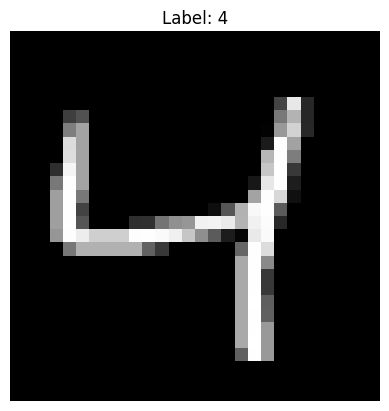

In [3]:
print(x_train[0][0:10, 0:10])
plt.imshow(x_train[2], cmap='gray')  # Display the first image with a grayscale colormap
plt.title(f"Label: {y_train[2]}")    # Show the label of the first image
plt.axis('off')                      # Hide axes for a cleaner image view
plt.show()

In [5]:
# Normalize the data (scale images to range of 0 - 1)
x_train, x_test = x_train / 255.0, x_test / 255.0

# Reshape the data to include the channel dimension (e.g., grayscale images)
print(x_train.shape)
x_train = x_train.reshape(-1, 28, 28, 1)
print(x_train.shape)

(60000, 28, 28, 1)
(60000, 28, 28, 1)


In [6]:
x_test = x_test.reshape(-1, 28, 28, 1)

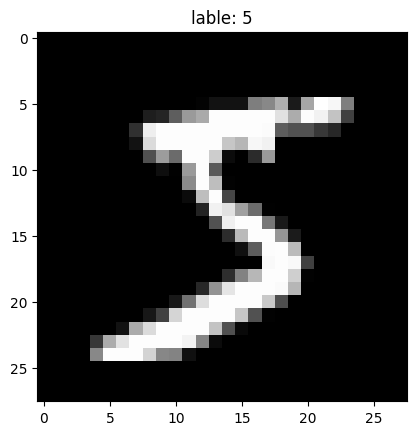

In [7]:
plt.imshow(x_train[0].reshape(28, 28), cmap="gray")
plt.title(f"lable: {y_train[0]}")
plt.show()

In [8]:
# Build the CNN Model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(64, (3, 3), activation='relu'),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')  # 10 classes for digits 0-9
])

model.summary()


d:\Projects\Learn-ML\venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 3, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 93,322 (364.54 KB)

 Trainable params: 93,322 (364.54 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
#Compile the Model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [10]:
# Train the Model
history = model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.5772 - loss: 1.1820 - val_accuracy: 0.9189 - val_loss: 0.2674
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9185 - loss: 0.2613 - val_accuracy: 0.9497 - val_loss: 0.1642
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9474 - loss: 0.1658 - val_accuracy: 0.9654 - val_loss: 0.1123
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9615 - loss: 0.1226 - val_accuracy: 0.9725 - val_loss: 0.0859
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9692 - loss: 0.0953 - val_accuracy: 0.9749 - val_loss: 0.0764


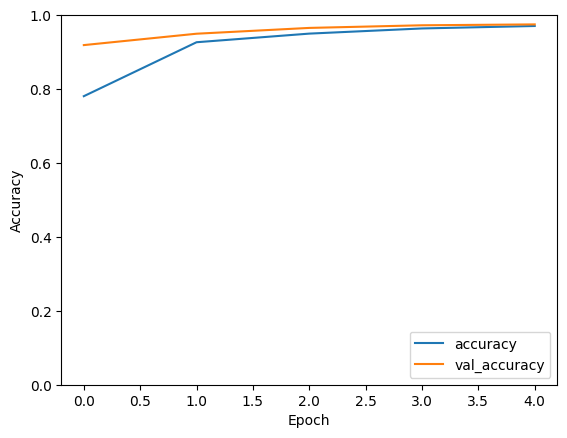

In [11]:
#Visualize the Training Process
# Plot training history
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()


In [ ]:
#Make Predictions
predictions = model.predict(x_test)

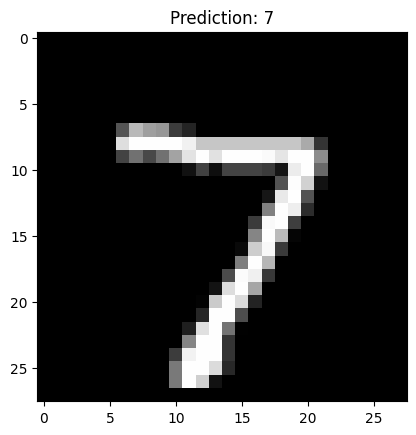

In [14]:

# Show prediction for the first test image
plt.imshow(x_test[0].reshape(28, 28), cmap="gray")
plt.title(f"Prediction: {np.argmax(predictions[0])}")
plt.show()


In [ ]:
#  Model Improvement (Optional)
# You can improve the model's performance using techniques such as:

# Data Augmentation: Apply transformations like rotation, zoom, and shifts to create more diverse training examples.
# Regularization: Add Dropout layers or use L2 regularization.
# Hyperparameter Tuning: Experiment with different architectures, optimizers, and batch sizes.

In [16]:
# Save the Model
model.save("mnist_cnn_model.keras")
